temperatura do 1100K -modelVF   'Dane-VFmniejsze1.csv'
temperatura do 1300K - modelVF   'daneT800-1300K.csv'

In [1]:

from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import absolute_import, division, print_function
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
import pylab
import numpy as np
from sklearn.preprocessing import MinMaxScaler


from keras import backend as K
import os

def set_keras_backend(backend):

    if K.backend() != backend:
        os.environ['KERAS_BACKEND'] = backend
        reload(K)
        assert K.backend() == backend

set_keras_backend("tensorflow")


json_file = open('modelVF1.2.7.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("modelVF1.2.7.h5")
print("Loaded model from disk")




Using TensorFlow backend.


Loaded model from disk


In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#zmiana csv!!! 
dane = pd.read_csv('daneT800-1500K.csv', sep = ";")
array = dane.values
x_data1 = dane.drop(['Cd'],axis=1)
y_val = dane[['Cd']].as_matrix()

scaler = MinMaxScaler()
scalerx = scaler.fit(x_data1)
x_data = scaler.transform(x_data1)


x_datas=pd.DataFrame(x_data, columns=['T','VF',  'Tr','l_tpb','E',  'i'])



X_train, X_test, y_train, y_test = train_test_split(x_datas,y_val,test_size=0.3,random_state=101)
X_test1 = X_test.as_matrix()
X_tst = scalerx.inverse_transform(X_test1)
X_tst = pd.DataFrame(X_tst)

x_data1



,T,VF,Tr,l_tpb,E,i
0,800,0.2,2,3,1.087036,0.00
1,800,0.2,2,3,1.087036,0.03
2,800,0.2,2,3,1.087036,0.06
3,800,0.2,2,3,1.087036,0.09
4,800,0.2,2,3,1.087036,0.12
5,800,0.2,2,3,1.087036,0.15
6,800,0.2,2,3,1.087036,0.18
7,800,0.2,2,3,1.087036,0.21
8,800,0.2,2,3,1.087036,0.24
9,800,0.2,2,3,1.087036,0.27


In [3]:
optimizer = tf.train.RMSPropOptimizer(0.001)

loaded_model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])


                     
[loss, mae] = loaded_model.evaluate(X_test.values, y_test, verbose=0)

print("Testing set Mean Abs Error: {:7.2f}".format(mae ))


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Testing set Mean Abs Error:  207.75


In [4]:
test_predictions = loaded_model.predict(x_datas.values).flatten()
print(test_predictions)

[1.6038763e+01 1.5208197e+01 1.4597967e+01 ... 6.2120707e+04 7.3876977e+04
 8.5686031e+04]


In [5]:

dane_pred = pd.DataFrame(test_predictions, columns=['pred'])
y_val = pd.DataFrame(y_val, columns = ['value'])
x_data = pd.DataFrame(x_data1, columns=['T','VF',  'Tr','l_tpb','E',  'i'])

porownanie = pd.concat([x_data, dane_pred, y_val, x_datas], axis =1)


porownanie.to_csv('porownanieread212.csv', sep=',')
porownanie

,T,VF,Tr,l_tpb,E,i,pred,value,T,VF,Tr,l_tpb,E,i
0,800,0.2,2,3,1.087036,0.00,16.038763,0.000000,0.0,0.0,0.0,0.0,0.493095,0.0
1,800,0.2,2,3,1.087036,0.03,15.208197,3.303537,0.0,0.0,0.0,0.0,0.493095,0.1
2,800,0.2,2,3,1.087036,0.06,14.597967,6.764090,0.0,0.0,0.0,0.0,0.493095,0.2
3,800,0.2,2,3,1.087036,0.09,13.872503,10.546135,0.0,0.0,0.0,0.0,0.493095,0.3
4,800,0.2,2,3,1.087036,0.12,13.414190,14.829433,0.0,0.0,0.0,0.0,0.493095,0.4
5,800,0.2,2,3,1.087036,0.15,21.245428,19.817565,0.0,0.0,0.0,0.0,0.493095,0.5
6,800,0.2,2,3,1.087036,0.18,28.429205,25.747614,0.0,0.0,0.0,0.0,0.493095,0.6
7,800,0.2,2,3,1.087036,0.21,40.092831,32.901433,0.0,0.0,0.0,0.0,0.493095,0.7
8,800,0.2,2,3,1.087036,0.24,50.899670,41.619038,0.0,0.0,0.0,0.0,0.493095,0.8
9,800,0.2,2,3,1.087036,0.27,74.671265,52.314772,0.0,0.0,0.0,0.0,0.493095,0.9


In [6]:
def scaler (X, min, max):
    X1 = (X-min)/(max-min)
    return X1
def rescaler(X1, min, max):
    X = X1*(max-min)+min
    return X

In [29]:
from scipy.interpolate import interp1d
def plot (T,VF, l, tortuosity,
         T1, VF1, l1, tortuosity1,
         T2, VF2, l2, tortuosity2):
    
    
  
    F = 96485
    R = 8.3145
                
    p_h2 = 97000
    p_h2o = 3000
                    
             
                
    L = 0.00005
    alpha = 0.5
    l_tpb = l*10**12
    l_tpb1 = l1*10**12
    l_tpb2 = l2*10**12
                

#math
    b = R*T/(F*alpha)
    
    i0_an = 31.4*l_tpb*p_h2**(-0.03)*p_h2o**(0.4)*np.exp(-152155/(T*R))
    sigma_ion = 3.4*10000*np.exp(-10350/T)
    sigma_ion_eff = sigma_ion*VF/tortuosity
    
    
    epsilon2 = (sigma_ion_eff*b)/(2*i0_an*L**2)
    epsilon = np.sqrt(epsilon2)
    
    b1 = R*T1/(F*alpha)
    
    i0_an1 = 31.4*l_tpb1*p_h2**(-0.03)*p_h2o**(0.4)*np.exp(-152155/(T1*R))
    sigma_ion1 = 3.4*10000*np.exp(-10350/T1)
    sigma_ion_eff1 = sigma_ion1*VF1/tortuosity1
    
    
    epsilon21 = (sigma_ion_eff1*b1)/(2*i0_an1*L**2)
    epsilon1 = np.sqrt(epsilon21)
    
    b2 = R*T2/(F*alpha)
    
    i0_an2 = 31.4*l_tpb2*p_h2**(-0.03)*p_h2o**(0.4)*np.exp(-152155/(T2*R))
    sigma_ion2 = 3.4*10000*np.exp(-10350/T2)
    sigma_ion_eff2 = sigma_ion2*VF2/tortuosity2
    
    
    epsilon22 = (sigma_ion_eff2*b2)/(2*i0_an2*L**2)
    epsilon2 = np.sqrt(epsilon22)

    

    Dane_eksperymentalne_X_1173 = [45.6925, 106.432, 147.833, 204.783, 252.943, 302.009]
    Dane_eksperymentalne_Y_1173 = [0.0293997, 0.0404605, 0.0507099, 0.0618844, 0.0704109, 0.0797427]
    Dane_eksperymentalne_X_1073 = [52.8008, 103.521, 148.03, 203.438, 250.446, 299.169]
    Dane_eksperymentalne_Y_1073 = [0.0610294, 0.0825527, 0.0977485, 0.114673, 0.130445, 0.141099]
    Dane_eksperymentalne_X_1273 = [57.6083,109.693,154.426,202.006,246.169,308.641]
    Dane_eksperymentalne_Y_1273 = [0.014856,0.0226306,0.0301458,0.0349322,0.0394077,0.0460601]

                    
    
    
    x = np.array ([0.00, 0.03, 0.06, 0.09, 0.12, 0.15, 0.18, 0.21, 0.24, 0.27, 0.3])
    
    
    
    #s stands for scaled
    Ts = scaler(T, x_data1['T'].min(), x_data1['T'].max())
    epsilons = scaler(epsilon, x_data1['E'].min(), x_data1['E'].max())
    ls = scaler(l, x_data1['l_tpb'].min(), x_data1['l_tpb'].max())
    tortuositys = scaler(tortuosity, x_data1['Tr'].min(), x_data1['Tr'].max())
    VFs = scaler(VF, x_data1['VF'].min(), x_data1['VF'].max())
    Ts1 = scaler(T1, x_data1['T'].min(), x_data1['T'].max())
    epsilons1 = scaler(epsilon1, x_data1['E'].min(), x_data1['E'].max())
    ls1 = scaler(l1, x_data1['l_tpb'].min(), x_data1['l_tpb'].max())
    tortuositys1 = scaler(tortuosity1, x_data1['Tr'].min(), x_data1['Tr'].max())
    VFs1 = scaler(VF1, x_data1['VF'].min(), x_data1['VF'].max())
    Ts2 = scaler(T2, x_data1['T'].min(), x_data1['T'].max())
    epsilons2 = scaler(epsilon2, x_data1['E'].min(), x_data1['E'].max())
    ls2 = scaler(l2, x_data1['l_tpb'].min(), x_data1['l_tpb'].max())
    tortuositys2 = scaler(tortuosity2, x_data1['Tr'].min(), x_data1['Tr'].max())
    VFs2 = scaler(VF2, x_data1['VF'].min(), x_data1['VF'].max())
    iS = scaler (x, 0, 0.3)
    
    xnew = np.linspace(0.0, 0.3, 50)
    
    #change for:
#     x
#     Dane_eksperymentalne_Y_1173
#     Dane_eksperymentalne_Y_1073
#     Dane_eksperymentalne_Y_1273
    
    
    data = {'T': np.repeat(T, len(x)), 
            'VF':np.repeat(VF, len(x)),
            'Tr' : np.repeat(tortuosity, len(x)),
            'l_tpb' : np.repeat(l,len(x)),
            'E': np.repeat(epsilon, len(x)), 
            
            'i' :  iS,
            }
    
    
    datas = {'T': np.repeat(Ts, len(x)), 
            'VF':np.repeat(VFs, len(x)),
            'Tr' : np.repeat(tortuositys, len(x)),
            'l_tpb' : np.repeat(ls,len(x)),
            'E': np.repeat(epsilons, len(x)), 
            
            'i' : iS,
            }
    datas1 = {'T': np.repeat(Ts1, len(x)), 
            'VF':np.repeat(VFs1, len(x)),
            'Tr' : np.repeat(tortuositys1, len(x)),
            'l_tpb' : np.repeat(ls1,len(x)),
            'E': np.repeat(epsilons1, len(x)), 
            
            'i' : iS,
            }
        
    datas2 = {'T': np.repeat(Ts2, len(x)), 
            'VF':np.repeat(VFs2, len(x)),
            'Tr' : np.repeat(tortuositys2, len(x)),
            'l_tpb' : np.repeat(ls2, len(x)),
            'E': np.repeat(epsilons2, len(x)), 
            
            'i' : iS,
            }   
    
    x_data = pd.DataFrame(data = data, columns=['T','VF','Tr','l_tpb','E', 'i'])
   
    x_datas = pd.DataFrame(data = datas, columns=['T','VF','Tr','l_tpb','E', 'i'])
    
    x_datas1 = pd.DataFrame(data = datas1, columns=['T','VF','Tr','l_tpb','E', 'i'])
    
    x_datas2 = pd.DataFrame(data = datas2, columns=['T','VF','Tr','l_tpb','E', 'i'])
    
    pred11 = loaded_model.predict(x_datas.values).flatten()
    pred1 = pred11/10
    pred22 = loaded_model.predict(x_datas1.values).flatten()
    pred2 = pred22/10
    pred33 = loaded_model.predict(x_datas2.values).flatten()
    pred3 = pred33/10
    pred1[0]=0
    pred2[0]=0
    pred3[0]=0
    
    array = x_data.values
    X = array[:,4]
    
    etab = x/b
    etab1 = x/b1
    etab2 = x/b2
    

    y11 = (sigma_ion_eff/L)*b*1/epsilon*np.sinh(etab)*(np.sinh(1/epsilon)/np.cosh(1/epsilon))
    y1 = y11/10
    y22 = (sigma_ion_eff1/L)*b1*1/epsilon1*np.sinh(etab1)*(np.sinh(1/epsilon1)/np.cosh(1/epsilon1))
    y2 = y22/10
    y33 = (sigma_ion_eff2/L)*b2*1/epsilon2*np.sinh(etab2)*(np.sinh(1/epsilon2)/np.cosh(1/epsilon2))
    y3 = y33/10
    
    plt.figure(facecolor='white')
    plt.style.use('classic')
    #plt.ylim(-0.0,0.3)
#     #plt.xlim(0, 3000)
    
    z1 = np.polyfit(x, pred1, 1)
    p1 = np.poly1d(z1)
    p1[0]=0
    z2 = np.polyfit(x, pred2, 1)
    p2 = np.poly1d(z2)
    p2[0]=0
    z3 = np.polyfit(x, pred3, 1)
    p3 = np.poly1d(z3)
    p3[0]=0
    xnew = np.linspace(0.0, 0.3, 50)
    
    epsilon = round(epsilon, 4)
    epsilon1 = round(epsilon1, 4)
    epsilon2 = round(epsilon2, 4)
    
   
#   #$\mathregular{e^{\sin(\omega\phi)}}$
    plt.xlabel(r'Gęstość prądu $\mathregular{({A}{cm^{-2}})}$', size = 16)
    plt.ylabel('Nadpotencjał (V)', size = 16)  
    plt.title('Porównanie wyników dla parametrów mikrostruktury')
    plt.plot(p1(xnew), xnew,'r' , label = 'SNN' )
    #plt.plot(y1, x, 'k', label='Benchmark $\it{T}$= %s [-]' %(T))
    plt.plot(p2(xnew), xnew,'r')
    #plt.plot(y2, x, 'k' , label='Benchmark $\it{T}$= %s [-]' %(T1))
    plt.plot(p3(xnew), xnew,'r' )
    #plt.plot(y3, x, 'k' , label='Benchmark $\it{T}$= %s [-]' %(T2))
    #plt.plot(pred1, x, 'rx' , label = '$\mathit{predicted}$')
    plt.scatter(Dane_eksperymentalne_X_1273, Dane_eksperymentalne_Y_1273, label = 'K1273')
    plt.scatter(Dane_eksperymentalne_X_1073, Dane_eksperymentalne_Y_1073,
            label = 'K1073')
    plt.scatter(Dane_eksperymentalne_X_1173, Dane_eksperymentalne_Y_1173,
            label = 'K1173')
    #plt.legend(loc='lower right', numpoints = 1)
    plt.savefig('wyniki_ANN_benchmark.png', dpi= 400)
    print('T= %s, l_tpb= %s, τ  = %s, ε= %s'%(T, l, tortuosity, epsilon2))
    plt.ylim(0.0, 0.25)
    plt.xlim(0.0, 400)
    #print (i0_an, sigma_ion, sigma_ion_eff )
    #plt.savefig('porownanieANN_BNdobretau.png', dpi= 400)
    plt.show()
    #print(datas, pred3, y3)
    
    

T= 1075, l_tpb= 2.5, τ  = 8.25, ε= 0.13


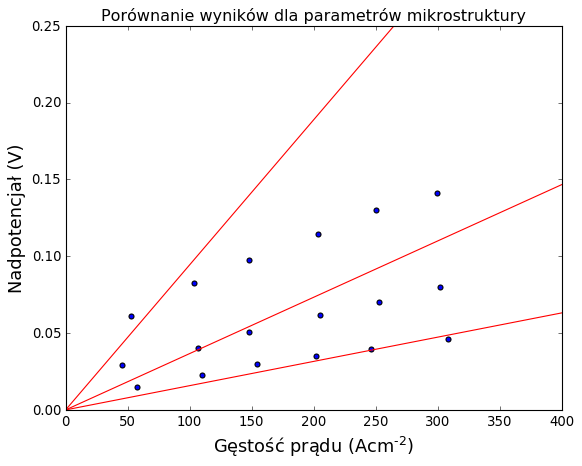

In [30]:
plot (1075, 0.25, 2.5, 8.25,
     1175, 0.25, 2.5, 8.25,
     1275, 0.25, 2.5, 8.25)

In [24]:
x_data1['T'].max()

1400

In [31]:
from scipy.interpolate import interp1d
def plot (T,VF, l, tortuosity,
         T1, VF1, l1, tortuosity1,
         T2, VF2, l2, tortuosity2):
    
    
  
    F = 96485
    R = 8.3145
                
    p_h2 = 97000
    p_h2o = 3000
                    
             
                
    L = 0.00005
    alpha = 0.5
    l_tpb = l*10**12
    l_tpb1 = l1*10**12
    l_tpb2 = l2*10**12
                

#math
    b = R*T/(F*alpha)
    
    i0_an = 31.4*l_tpb*p_h2**(-0.03)*p_h2o**(0.4)*np.exp(-152155/(T*R))
    sigma_ion = 3.4*10000*np.exp(-10350/T)
    sigma_ion_eff = sigma_ion*VF/tortuosity
    
    
    epsilon2 = (sigma_ion_eff*b)/(2*i0_an*L**2)
    epsilon = np.sqrt(epsilon2)
    
    b1 = R*T1/(F*alpha)
    
    i0_an1 = 31.4*l_tpb1*p_h2**(-0.03)*p_h2o**(0.4)*np.exp(-152155/(T1*R))
    sigma_ion1 = 3.4*10000*np.exp(-10350/T1)
    sigma_ion_eff1 = sigma_ion1*VF1/tortuosity1
    
    
    epsilon21 = (sigma_ion_eff1*b1)/(2*i0_an1*L**2)
    epsilon1 = np.sqrt(epsilon21)
    
    b2 = R*T2/(F*alpha)
    
    i0_an2 = 31.4*l_tpb2*p_h2**(-0.03)*p_h2o**(0.4)*np.exp(-152155/(T2*R))
    sigma_ion2 = 3.4*10000*np.exp(-10350/T2)
    sigma_ion_eff2 = sigma_ion2*VF2/tortuosity2
    
    
    epsilon22 = (sigma_ion_eff2*b2)/(2*i0_an2*L**2)
    epsilon2 = np.sqrt(epsilon22)

    

    Dane_eksperymentalne_X_1173 = [45.6925, 106.432, 147.833, 204.783, 252.943, 302.009]
    Dane_eksperymentalne_Y_1173 = [0.0293997, 0.0404605, 0.0507099, 0.0618844, 0.0704109, 0.0797427]
    Dane_eksperymentalne_X_1073 = [52.8008, 103.521, 148.03, 203.438, 250.446, 299.169]
    Dane_eksperymentalne_Y_1073 = [0.0610294, 0.0825527, 0.0977485, 0.114673, 0.130445, 0.141099]
    Dane_eksperymentalne_X_1273 = [57.6083,109.693,154.426,202.006,246.169,308.641]
    Dane_eksperymentalne_Y_1273 = [0.014856,0.0226306,0.0301458,0.0349322,0.0394077,0.0460601]

                    
    
    
    x = np.array ([0.00, 0.03, 0.06, 0.09, 0.12, 0.15, 0.18, 0.21, 0.24, 0.27, 0.3])
    
    
    Ts = scaler(T, x_data1['T'].min(), x_data1['T'].max())
    epsilons = scaler(epsilon, x_data1['E'].min(), x_data1['E'].max())
    ls = scaler(l, x_data1['l_tpb'].min(), x_data1['l_tpb'].max())
    tortuositys = scaler(tortuosity, x_data1['Tr'].min(), x_data1['Tr'].max())
    VFs = scaler(VF, x_data1['VF'].min(), x_data1['VF'].max())
    Ts1 = scaler(T1, x_data1['T'].min(), x_data1['T'].max())
    epsilons1 = scaler(epsilon1, x_data1['E'].min(), x_data1['E'].max())
    ls1 = scaler(l1, x_data1['l_tpb'].min(), x_data1['l_tpb'].max())
    tortuositys1 = scaler(tortuosity1, x_data1['Tr'].min(), x_data1['Tr'].max())
    VFs1 = scaler(VF1, x_data1['VF'].min(), x_data1['VF'].max())
    Ts2 = scaler(T2, x_data1['T'].min(), x_data1['T'].max())
    epsilons2 = scaler(epsilon2, x_data1['E'].min(), x_data1['E'].max())
    ls2 = scaler(l2, x_data1['l_tpb'].min(), x_data1['l_tpb'].max())
    tortuositys2 = scaler(tortuosity2, x_data1['Tr'].min(), x_data1['Tr'].max())
    VFs2 = scaler(VF2, x_data1['VF'].min(), x_data1['VF'].max())
    iS = scaler(x, 0, 0.3)
   
    xnew = np.linspace(0.0, 0.3, 50)
    
    data = {'T': np.repeat(T, len(x)), 
            'VF':np.repeat(VF, len(x)),
            'Tr' : np.repeat(tortuosity, len(x)),
            'l_tpb' : np.repeat(l,len(x)),
            'E': np.repeat(epsilon, len(x)), 
            
            'i' :  iS,
            }
    
    
    datas = {'T': np.repeat(Ts, len(x)), 
            'VF':np.repeat(VFs, len(x)),
            'Tr' : np.repeat(tortuositys, len(x)),
            'l_tpb' : np.repeat(ls,len(x)),
            'E': np.repeat(epsilons, len(x)), 
            
            'i' : iS,
            }
    datas1 = {'T': np.repeat(Ts1, len(x)), 
            'VF':np.repeat(VFs1, len(x)),
            'Tr' : np.repeat(tortuositys1, len(x)),
            'l_tpb' : np.repeat(ls1,len(x)),
            'E': np.repeat(epsilons1, len(x)), 
            
            'i' : iS,
            }
        
    datas2 = {'T': np.repeat(Ts2, len(x)), 
            'VF':np.repeat(VFs2, len(x)),
            'Tr' : np.repeat(tortuositys2, len(x)),
            'l_tpb' : np.repeat(ls2, len(x)),
            'E': np.repeat(epsilons2, len(x)), 
            
            'i' : iS,
            }   
    
    x_data = pd.DataFrame(data = data, columns=['T','VF','Tr','l_tpb','E', 'i'])
   
    x_datas = pd.DataFrame(data = datas, columns=['T','VF','Tr','l_tpb','E', 'i'])
    
    x_datas1 = pd.DataFrame(data = datas1, columns=['T','VF','Tr','l_tpb','E', 'i'])
    
    x_datas2 = pd.DataFrame(data = datas2, columns=['T','VF','Tr','l_tpb','E', 'i'])
    
    pred11 = loaded_model.predict(x_datas.values).flatten()
    pred1 = pred11/10
    pred22 = loaded_model.predict(x_datas1.values).flatten()
    pred2 = pred22/10
    pred33 = loaded_model.predict(x_datas2.values).flatten()
    pred3 = pred33/10
    pred1[0]=0
    pred2[0]=0
    pred3[0]=0
    
    array = x_data.values
    X = array[:,4]
    
    etab = x/b
    etab1 = x/b1
    etab2 = x/b2
    

    y11 = (sigma_ion_eff/L)*b*1/epsilon*np.sinh(etab)*(np.sinh(1/epsilon)/np.cosh(1/epsilon))
    y1 = y11/10
    y22 = (sigma_ion_eff1/L)*b1*1/epsilon1*np.sinh(etab1)*(np.sinh(1/epsilon1)/np.cosh(1/epsilon1))
    y2 = y22/10
    y33 = (sigma_ion_eff2/L)*b2*1/epsilon2*np.sinh(etab2)*(np.sinh(1/epsilon2)/np.cosh(1/epsilon2))
    y3 = y33/10
    
    plt.figure(facecolor='white')
    plt.style.use('classic')
    #plt.ylim(-0.0,0.3)
#     #plt.xlim(0, 3000)
    
    z1 = np.polyfit(x, pred1, 2)
    p1 = np.poly1d(z1)
    p1[0]=0
    z2 = np.polyfit(x, pred2, 1)
    p2 = np.poly1d(z2)
    p2[0]=0
    z3 = np.polyfit(x, pred3, 1)
    p3 = np.poly1d(z3)
    p3[0]=0
    xnew1 = np.linspace(0, 0.28, 50)
    xnew2 = np.linspace(0, 0.11, 50)
    xnew3 = np.linspace(0, 0.048, 50)
    
    epsilon = round(epsilon, 4)
    epsilon1 = round(epsilon1, 4)
    epsilon2 = round(epsilon2, 4)
    
   
#   #$\mathregular{e^{\sin(\omega\phi)}}$
    plt.xlabel(r'Gęstość prądu $\mathregular{({mA}{cm^{-2}})}$', size = 16)
    plt.ylabel('Nadpotencjał (V)', size = 16)  
    plt.title('Porównanie wyników dla parametrów mikrostruktury')
    plt.plot(p1(xnew1), xnew1,'b' , label = 'SNN 1073K' )
    #plt.plot(y1, x, 'k', label='Benchmark $\it{T}$= %s [-]' %(T))
    plt.plot(p2(xnew2), xnew2,'r', label = 'SNN 1073K' )
    #plt.plot(y2, x, 'k' , label='Benchmark $\it{T}$= %s [-]' %(T1))
    plt.plot(p3(xnew3), xnew3,'k' , label = 'SNN 1073K' )
    #plt.plot(y3, x, 'k' , label='Benchmark $\it{T}$= %s [-]' %(T2))
    #plt.plot(pred1, x, 'rx' , label = '$\mathit{predicted}$')
    plt.plot(Dane_eksperymentalne_X_1073, Dane_eksperymentalne_Y_1073, 'b^',
            label = '1073K ex')
    plt.plot(Dane_eksperymentalne_X_1173, Dane_eksperymentalne_Y_1173, 'r.',
            label = '1173K ex')
    plt.plot(Dane_eksperymentalne_X_1273, Dane_eksperymentalne_Y_1273,'ks', label = '1273K ex')
    
    plt.legend(loc='best', numpoints = 1, ncol = 2, frameon= False)
    plt.savefig('wyniki_ANN_benchmark.png', dpi= 400)
    print('T= %s, l_tpb= %s, τ  = %s, ε= %s'%(T, l, tortuosity, epsilon2))
    
    plt.grid(True)
    
    #print (i0_an, sigma_ion, sigma_ion_eff )
    plt.savefig('porownanieANN_Kishimoto.png', dpi= 400)
    plt.show()
    print( pred1, pred2, pred3)
    
    

T= 1075, l_tpb= 2.5, τ  = 8.25, ε= 0.13


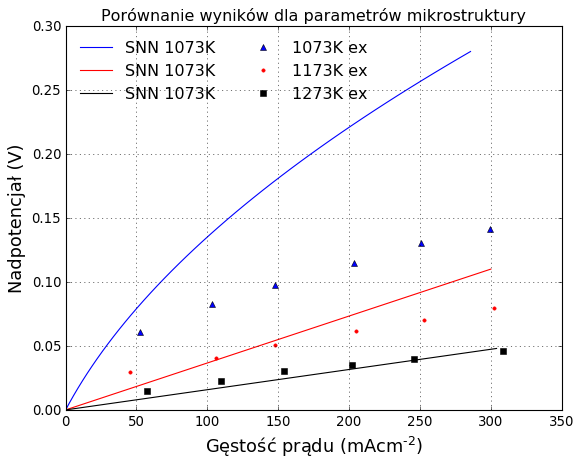

[  0.        16.920294  38.287575  71.96572  100.00456  124.15891
 150.72984  182.71834  212.6835   272.16733  335.72095 ] [  0.       72.04088 125.56154 181.49486 267.07315 340.45068 417.17865
 522.49585 614.9981  709.5494  830.2575 ] [   0.       168.05783  331.93826  458.4104   605.3938   810.46643
  992.2709  1160.1023  1373.2683  1670.0715  1996.7432 ]


In [32]:
plot (1075, 0.25, 2.5, 8.25,
     1175, 0.25, 2.5, 8.25,
     1275, 0.25, 2.5, 8.25)

In [ ]:
Dane_eksperymentalne_X_1273 = [57.6083,109.693,154.426,202.006,246.169,308.641]
Dane_eksperymentalne_Y_1273 = [0.014856,0.0226306,0.0301458,0.0349322,0.0394077,0.0460601]
Dane_eksperymentalne_X_1173 = [45.6925, 106.432, 147.833, 204.783, 252.943, 302.009]
Dane_eksperymentalne_Y_1173 = [0.0293997, 0.0404605, 0.0507099, 0.0618844, 0.0704109, 0.0797427]
Dane_eksperymentalne_X_1073 = [52.8008, 103.521, 148.03, 203.438, 250.446, 299.169]
Dane_eksperymentalne_Y_1073 = [0.0610294, 0.0825527, 0.0977485, 0.114673, 0.130445, 0.141099]